In [1]:
import torch
from kornia.enhance import histogram
import os
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [6]:
path = "styletransfer/cut/datasets/road6/trainB"
files = os.listdir(path)
n_bins = 20
n_images = 10
imgs = np.array([np.asarray(Image.open(os.path.join(path,file))) for file in files[:n_images]])
imgs_raw = imgs
imgs = np.transpose(imgs, [0,3,1,2])
imgs.shape
imgs = 2 * (torch.tensor(imgs).cpu() / 255.0) - 1

labels = np.array([int(file.split("_")[2][0]) for file in files])

In [4]:
bins = torch.torch.linspace(-1, 1, n_bins).cpu()
B, C, W, H = imgs.shape

# print(torch.max(self.real_B))
hist = torch.cat(
    [histogram(imgs[:, c, :, :].view(B, W * H), bins, bandwidth=torch.tensor((2/n_bins)).cpu()) for c in
    [0, 1, 2]], dim=1)

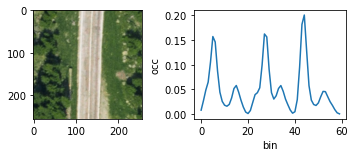

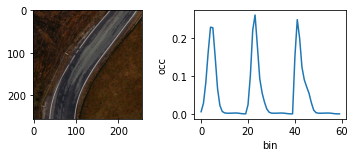

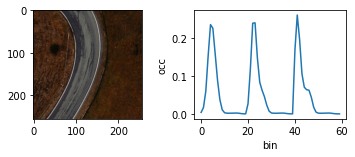

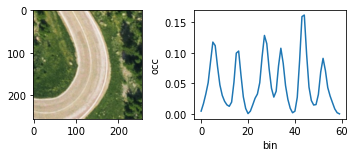

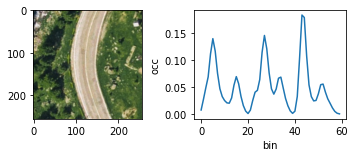

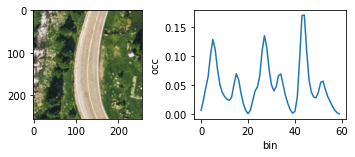

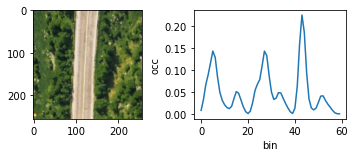

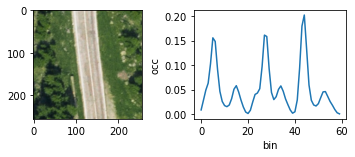

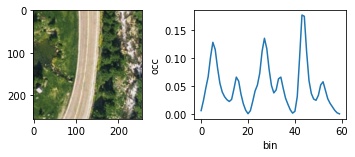

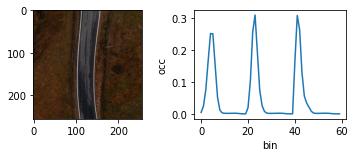

In [27]:
for i, img in enumerate(hist.cpu().detach().numpy()):
    fig, axs = plt.subplots(1, 2)
    fig.set_size_inches(6,2)
    axs[0].imshow(imgs_raw[i])
    axs[1].plot(img)
    axs[1].set_xlabel("bin")
    axs[1].set_ylabel("occ")

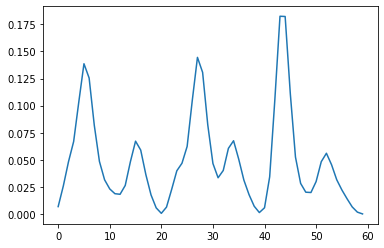

In [20]:
labels = labels[:n_images]

m1 = torch.mean(hist[np.where(labels == 0)], dim=0)

plt.plot(m1)